### Problem Identify
AirBnb Listing in Bangkok
***

### Data Preparation
In this section, import the required libraries and have a quick look of the data
***

In [36]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
df = pd.read_csv("./Airbnb Listings Bangkok.csv")

display(df.head(), df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


### Data Understanding
In this section, comparison between the knowledge of the data and the data itself is being done.
***

In [38]:
cleanedDf = df.copy()

>From the provided data dictionary, this is the meaning of each columns:
>- id&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Airbnb's unique identifier for the listing.
>- name&emsp;&emsp;&emsp;&nbsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Name of the listing.
>- host_id&emsp;&emsp;&emsp;&nbsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Airbnb's unique identifier for the host/user.
>- host_name&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Name of the host. Usually, just the first name(s)
>- neighbourhood&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: The neighborhood is geocoded using the latitude and against neighborhoods as defined by open or public digital shapefiles.
>- latitude&emsp;&ensp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Uses the World Geodetic System (WGS84) projection for latitude and longitude
>- longitude&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Uses the World Geodetic System (WGS84) projection for latitude and longitude
>- room_type&emsp;&emsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Entire home/apt | Private room | Shared room | Hotel
>- price&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Daily price in local currency.
>- minimum_nights&emsp;&emsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;: The minimum number of night stays for the listing
>- number_of_reviews&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: The number of reviews the listing has.
>- last_review&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: The date of the last/newest review
>- calculated_host_listings_count&nbsp;&ensp;: The number of listings the host has in the current scrape in the city/region geography.
>- availability_365&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: The calendar determines the availability of the listing x days in the future.
>- number_of_reviews_ltm&emsp;&emsp;&emsp;&emsp;: The number of reviews the listing has (in the last 12 months)

In [39]:
cleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

>Check if the provided csv data columns matched with the definition       
>There are only **15 columns** definition from the provided data dictionary, meanwhile there are **17 columns** in the csv data      
>2 columns that are not defined in the data dictionary:      
>- **Unnamed: 0** with index **0**
>- **reviews_per_month** with index **13**

In [40]:
display(cleanedDf['Unnamed: 0'].head(10), cleanedDf['reviews_per_month'].head(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

0    0.50
1     NaN
2     NaN
3    0.03
4     NaN
5    0.17
6    0.01
7     NaN
8    0.09
9    0.03
Name: reviews_per_month, dtype: float64

>Seems like the **Unnamed: 0** column is just an index of each row, which isn't required so it's safe to drop this column      
>Meanwhile the **reviews_per_month** might be the average percentage of a review in each month as the name suggests

In [41]:
cleanedDf.drop(['Unnamed: 0'], axis='columns', inplace=True)

cleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

### Data Cleansing
In this section, records with missing values are analyzed and cleaned.
***

In [42]:
display(cleanedDf.isna().sum())

print(f"Original cleanedDf Shape\t: {cleanedDf.shape}")

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Original cleanedDf Shape	: (15854, 16)


>There are several missing values in the data columns:
>- name&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: 8 missing values
>- host_name&emsp;&emsp;&emsp;&emsp;&emsp;: 1 missing value
>- last_review&emsp;&emsp;&emsp;&emsp;&emsp;: 5790 missing values
>- reviews_per_month&emsp;: 5790 missing values

In [43]:
nullPercentage = cleanedDf.isna().sum() / cleanedDf.shape[0]*100
nullPercentage[nullPercentage > 0]

name                  0.050460
host_name             0.006308
last_review          36.520752
reviews_per_month    36.520752
dtype: float64

<Axes: >

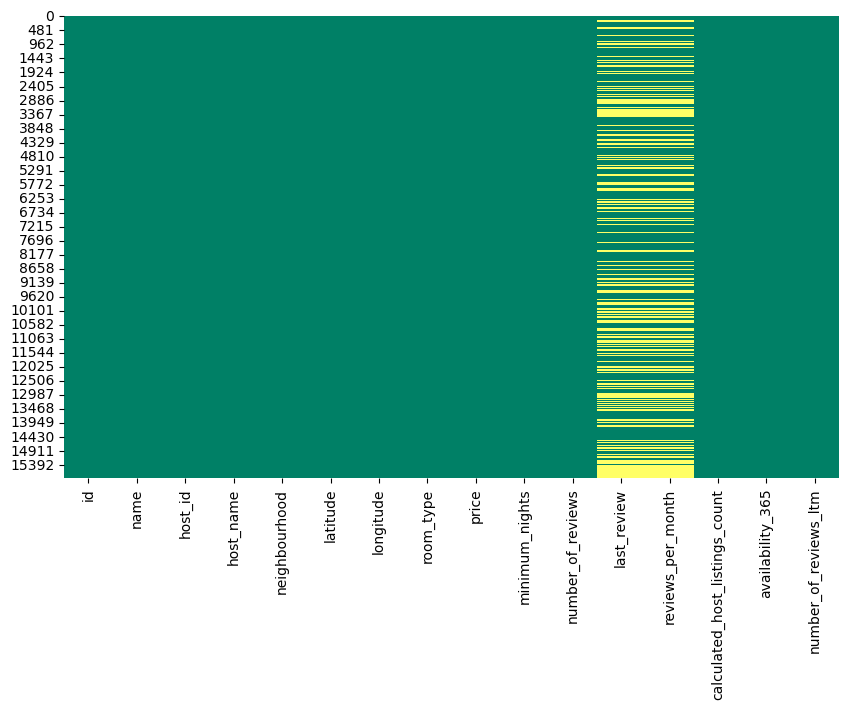

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(cleanedDf.isna(), cmap='summer', cbar=False)

In [45]:
print(f"Null percentage of last_review column\t\t: {nullPercentage['last_review']}")
print(f"Null percentage of reviews_per_month column\t: {nullPercentage['reviews_per_month']}")

Null percentage of last_review column		: 36.520751860729156
Null percentage of reviews_per_month column	: 36.520751860729156


In [46]:
cleanedDf['last_review'] = cleanedDf['last_review'].fillna('No Review')
cleanedDf['reviews_per_month'] = cleanedDf['reviews_per_month'].fillna(0)

> In the heatmap above, it shown that **last_review** columns are strongly related with **reviews_per_month** columns since they always appears as green / yellow together. So the missing value type of these two columns are **MAR (Missing at Random)**.
>
> The assumption for these two columns are the rooms have never been rented to yet and the null percentage of these columns considered pretty high with **36.5%**. Therefore, **data imputation** is done for these columns by substituting null value in **last_review** column with *'No Review'* and null value in **reviews_per_month** column with *'0'*

In [47]:
display(cleanedDf[cleanedDf['name'].isna()])

print(f"Null percentage of name column\t: {nullPercentage['name']}")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,No Review,0.00,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,No Review,0.00,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,No Review,0.00,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,No Review,0.00,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,No Review,0.00,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,No Review,0.00,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Null percentage of name column	: 0.050460451621042006


In [48]:
cleanedDf.dropna(subset=['name'], inplace=True)

>In the **name** column, there's no logical or visible connection between this **name** column as seen in the heatmap above. So the missing value type of this column is **MCAR (Missing Completly at Random)**, it also shown that the null percentage on the **name** are negligible.
>
>Thus, **deletion** is done to these missing value in **name** column.

In [49]:
display(cleanedDf[cleanedDf['host_name'].isna()], cleanedDf[cleanedDf['host_id'] == 137488762])

print(f"Null percentage of host_name column\t: {nullPercentage['host_name']}")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Null percentage of host_name column	: 0.006307556452630251


In [50]:
cleanedDf.dropna(subset=['host_name'], inplace=True)

>In the **host_name** column, it doesn't appear together as null value with any of other columns but its strongly related with **host_id**, since the assumption **host_name** has unique **host_id**. So the missing value type is **MAR (Missing at Random)**      
>
>The null percentage in **host_name** columns are negligible and the **host_id** for **host_name Cozy Hideaway** is **137488762**, and it's shown that this **host_id** only has **one listing**, therefore it's impossible to insert based on the existing record.
>
>As summary, **deletion** is done to the missing value in **host_name** column because it isn't really importance for the analysis. 

In [51]:
cleanedDf['last_review'] = cleanedDf['last_review'].apply(lambda x: 'No Review' if x == 'No Review' else datetime.datetime.strptime(x, "%Y-%m-%d"))

>Convert the last_review column type into date time if the record isn't *No Review*

In [52]:
bins = [-0.1, 50, 150, 300, 500, cleanedDf['number_of_reviews'].max()]
labels = ['0-50', '50-150', '150-300', '300-500', '500+']
cleanedDf['reviews_bin'] = pd.cut(cleanedDf['number_of_reviews'], bins=bins, labels=labels)

>Create reviews_bin to categorize number_of_reviews into 5 different category: **0-50**, **50-150**, **150-300**, **300-500**, **500+**

In [53]:
listItem = []
for col in cleanedDf.columns :
    listItem.append([col, cleanedDf[col].dtype, cleanedDf[col].isna().sum(),
                    cleanedDf[col].nunique(), list(cleanedDf[col].drop_duplicates().sample(2).values)]);

cleanedDfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], data=listItem)
display(cleanedDfDesc)

print(f'cleanedDf shape\t: {cleanedDf.shape}')

,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15845,"[36741661, 7736302]"
1,name,object,0,14793,"[Big room,2 king bed with pool view, nirun Cit..."
2,host_id,int64,0,6651,"[31443036, 13859456]"
3,host_name,object,0,5306,"[Kamal, Jutha]"
4,neighbourhood,object,0,50,"[Thung khru, Bang Sue]"
5,latitude,float64,0,9602,"[13.75725, 13.7315]"
6,longitude,float64,0,10222,"[100.58409, 100.59147]"
7,room_type,object,0,4,"[Shared room, Private room]"
8,price,int64,0,3040,"[11614, 8229]"
9,minimum_nights,int64,0,86,"[30, 356]"


cleanedDf shape	: (15845, 17)


>Now the data is already clean, no null value on each columns. The total records of original data was **15854**, which mean **9** records were deleted, primarily records with missing value in **name** and **host_name** columns. And the rest are imputed with relevant value.

In [54]:
cleanedDf.duplicated().sum()

0

### Data Segmentation and Cleaning
In this section, segmentation by room_type is applied because handling outliers for the entire dataset is complex, as each room_type exhibits different behavior.
***

In [55]:
cleanedDf['room_type'].value_counts()

room_type
Entire home/apt    8911
Private room       5762
Hotel room          649
Shared room         523
Name: count, dtype: int64

In [56]:
entireHome = cleanedDf[cleanedDf['room_type'] == 'Entire home/apt'].copy()
privateRoom = cleanedDf[cleanedDf['room_type'] == 'Private room'].copy()
hotelRoom = cleanedDf[cleanedDf['room_type'] == 'Hotel room'].copy()
sharedRoom = cleanedDf[cleanedDf['room_type'] == 'Shared room'].copy()

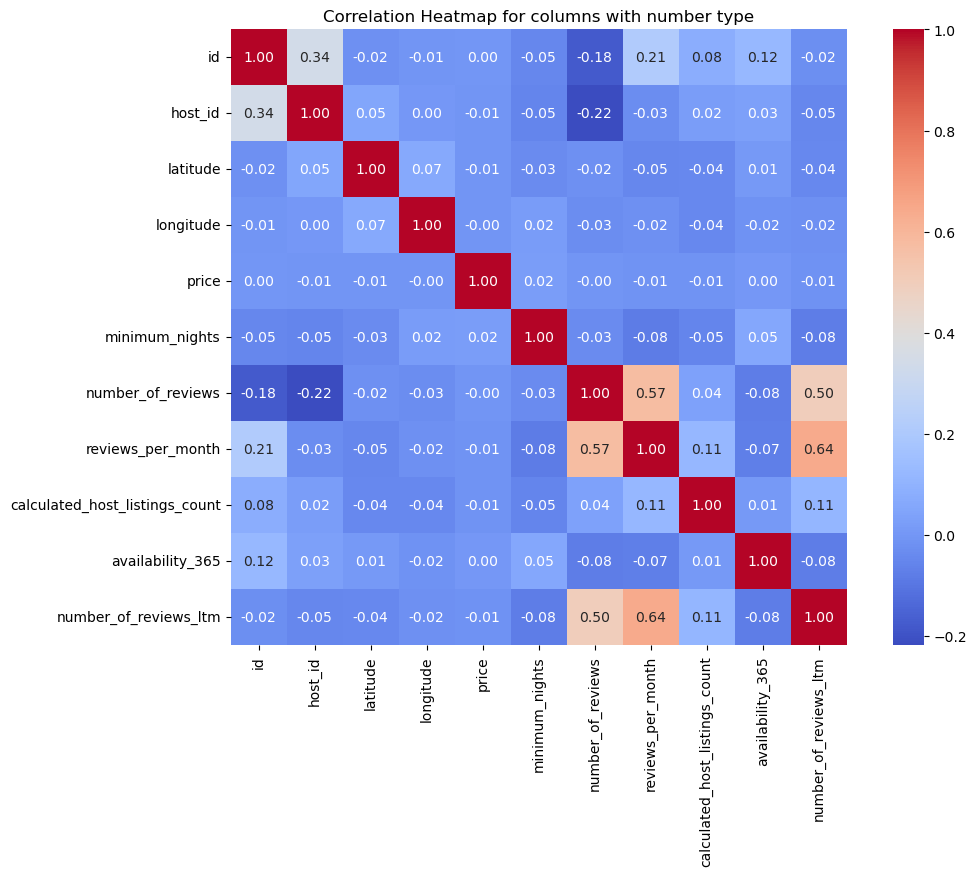

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(cleanedDf.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap for columns with number type')
plt.show()

> Check the normality of each numerical columns to determine the best method for counting the numbers of outliers       
> - For **normally distributed** data, **Z-Score** method will be applied     
> - For **not normally distributed** data, **IQR** method will be applied               
>
> Only **'price', 'minimum_nights', 'availability_365'** columns are interesting to be analyzed because there are no correlation to the other columns as shown in the heatmap above

In [58]:
def checkNormality(df, name):
    print(f"Normality test for {name}")
    print("===============================================")
    for column in df[['price', 'minimum_nights', 'availability_365']]:
        stat, p = stats.shapiro(df[column])
        print(f'{column} - p-value: {p}')
        if p > 0.05:
            print(f'{column} is normally distributed\n')
        else:
            print(f'{column} is not normally distributed\n')
    print()
    
def countOutliersWithIQRMethod(df, name):
    print(f"Count outliers for {name}")
    print("===============================================")
    for column in df[['price', 'minimum_nights', 'availability_365']]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f'{column} has {len(entireHome[(entireHome[column] < lower_bound) | (entireHome[column] > upper_bound)])} outliers')
    print()

In [59]:
checkNormality(entireHome, "Entire Home")
checkNormality(privateRoom, "Private Room")
checkNormality(hotelRoom, "Hotel Room")
checkNormality(sharedRoom, "Shared Room")

Normality test for Entire Home
price - p-value: 5.325548056515827e-111
price is not normally distributed

minimum_nights - p-value: 1.435188333061534e-101
minimum_nights is not normally distributed

availability_365 - p-value: 1.5654160203882344e-64
availability_365 is not normally distributed


Normality test for Private Room
price - p-value: 1.249508771479282e-97
price is not normally distributed

minimum_nights - p-value: 2.1200822528784715e-94
minimum_nights is not normally distributed

availability_365 - p-value: 6.1932730650465946e-68
availability_365 is not normally distributed


Normality test for Hotel Room
price - p-value: 9.275698419852333e-48
price is not normally distributed

minimum_nights - p-value: 2.1191454857956923e-47
minimum_nights is not normally distributed

availability_365 - p-value: 2.501562214265059e-31
availability_365 is not normally distributed


Normality test for Shared Room
price - p-value: 1.245056015083046e-41
price is not normally distributed

minimum

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8911.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5762.
  res = hypotest_fun_out(*samples, **kwds)


In [60]:
countOutliersWithIQRMethod(entireHome, "Entire Home")
countOutliersWithIQRMethod(privateRoom, "Private Room")
countOutliersWithIQRMethod(hotelRoom, "Hotel Room")
countOutliersWithIQRMethod(sharedRoom, "Shared Room")

Count outliers for Entire Home
price has 772 outliers
minimum_nights has 518 outliers
availability_365 has 0 outliers

Count outliers for Private Room
price has 1005 outliers
minimum_nights has 3860 outliers
availability_365 has 0 outliers

Count outliers for Hotel Room
price has 471 outliers
minimum_nights has 5748 outliers
availability_365 has 0 outliers

Count outliers for Shared Room
price has 6633 outliers
minimum_nights has 5748 outliers
availability_365 has 0 outliers



>As it shown above, **Shared room** has the highest total number of **outlier**, let's analyze why this might happen

In [61]:
display(sharedRoom[['price', 'minimum_nights', 'availability_365']].describe(), sharedRoom['minimum_nights'].value_counts())

,price,minimum_nights,availability_365
count,523.000000,523.000000,523.000000
mean,919.757170,3.690249,270.147228
std,2147.960499,27.934372,118.741918
min,280.000000,1.000000,0.000000
25%,390.000000,1.000000,179.000000
50%,500.000000,1.000000,358.000000
75%,650.000000,1.000000,365.000000
max,31200.000000,365.000000,365.000000


minimum_nights
1      480
2       15
3        5
4        4
10       3
365      3
7        3
5        3
6        3
30       2
90       1
60       1
Name: count, dtype: int64

In [62]:
cleanedDf = cleanedDf[~((cleanedDf['room_type'] == 'Shared Room') & (cleanedDf['minimum_nights'] > 365))]

> From the previous knowledge, **shared rooms** are popular among budget friendly and looking for new friends **travelers**. So, record with minimum_nights equal to 365 are dropped because it doesn't make sense for travelers to stay for a whole year.

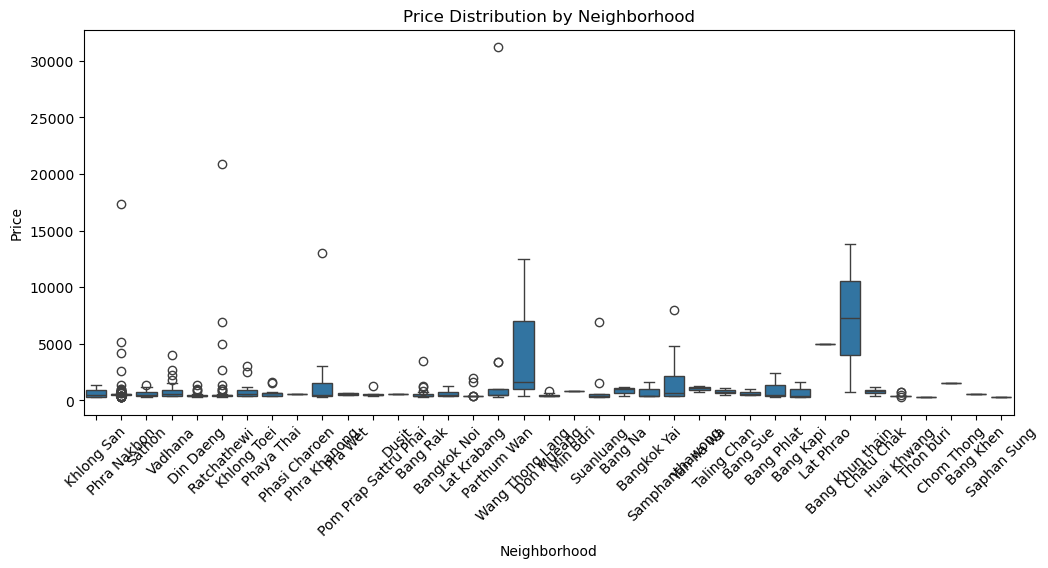

In [64]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='neighbourhood', y='price', data=sharedRoom)
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighborhood')
plt.ylabel('Price')
plt.xlabel('Neighborhood')
plt.show()

> As shown in box plot above, the **price** column is highly affected by the **neighborhood** column. Logically, the **price** of the room itself is also affected by several other factors such as: room service, distance to mini markets or tourism destinations, etc.
>
> So, removing / substituting the **price** column won't be an appropriate step. This argument is also valid for another room type

### Data Analysis
In this section, some questions regarding customer's behavior and room owner's behavior will be analyzed and visualized
***

#### Customer's behavior

##### Which neighborhood is the most popular for tourism?

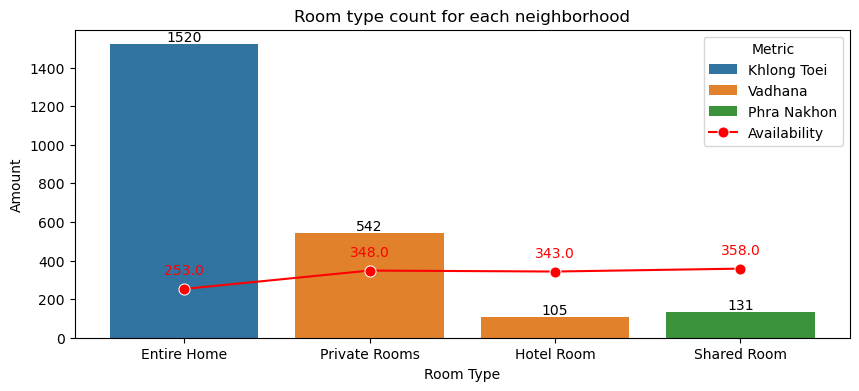

In [65]:
groupedRoomType = pd.DataFrame(data=[[ 'Entire Home',  entireHome['neighbourhood'].value_counts().idxmax(),  entireHome['neighbourhood'].value_counts().max(),    entireHome['availability_365'].median() ],
                                     [ 'Private Rooms', privateRoom['neighbourhood'].value_counts().idxmax(), privateRoom['neighbourhood'].value_counts().max(),  privateRoom['availability_365'].median()],
                                     [ 'Hotel Room',   hotelRoom['neighbourhood'].value_counts().idxmax(),   hotelRoom['neighbourhood'].value_counts().max(),     hotelRoom['availability_365'].median()  ],
                                     [ 'Shared Room',  sharedRoom['neighbourhood'].value_counts().idxmax(),  sharedRoom['neighbourhood'].value_counts().max(),    sharedRoom['availability_365'].median() ]],
                                     columns=['Room Type', 'Neighborhood', "Amount", "Availability"])

plt.figure(figsize=(10,4))
plt.title('Room type count for each neighborhood')
plot = sns.barplot(data=groupedRoomType, x='Room Type', y='Amount', hue='Neighborhood')
for amount in plot.containers:
    plot.bar_label(amount)
    
line = sns.lineplot(data=groupedRoomType, x='Room Type', y='Availability', color='red', marker='o', markersize=8, label='Availability')
for index, row in groupedRoomType.iterrows():
    plt.text(x=index, y=row['Availability'] + 75, s=f"{row['Availability']}", ha='center', color='red')
    
plt.legend(title="Metric")
plt.show()

plt.show()

>From the graph shown above, **Phra Nakhon** is the most popular neighborhood for tourism because it stated that **Shared Room** is popular for **travelers**.      
>Meanwhile the **Khlong Toei** neighborhood is popular as **residential area** shown by the high amount of **Entire Home** unit, which travelers might not need the entire home for their vacation.     
>**Hotel room** and **Shared room** are popular for tourists, and it is shown that **Hotel room** tends booked more than shared room.

##### What is the behavior of customers when leaving a review?

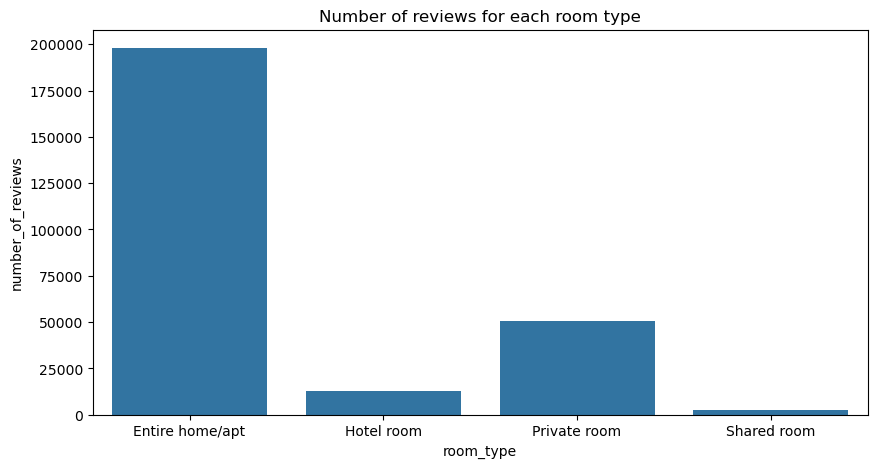

In [67]:
numberReviewsForEachRoomType = cleanedDf.groupby('room_type').agg({
    'number_of_reviews': 'sum'
})

plt.figure(figsize=(10, 5))
sns.barplot(data=numberReviewsForEachRoomType, x='room_type', y='number_of_reviews')
plt.title('Number of reviews for each room type')
plt.show()

>From the bar plot shown above, **Entire Home** has the most number of reviews, followed by **Private Room**, **Hotel Room**, and **Shared Room**. Showing that user behavior on leaving a review is affected by the room type.

In [68]:
display(
    'Top 5 Most Popular Entire Home Listings by Neighborhood and Price',
    entireHome.groupby('neighbourhood').agg({
        'number_of_reviews': 'sum',
        'price': 'median',
    }).reset_index().sort_values(by='number_of_reviews', ascending=False).head(),
    
    'Top 5 Most Popular Private Room Listings by Neighborhood and Price',
    privateRoom.groupby('neighbourhood').agg({
        'number_of_reviews': 'sum',
        'price': 'median',
    }).reset_index().sort_values(by='number_of_reviews', ascending=False).head(),
    
    'Top 5 Most Popular Hotel Room Listings by Neighborhood and Price',
    hotelRoom.groupby('neighbourhood').agg({
        'number_of_reviews': 'sum',
        'price': 'median',
    }).reset_index().sort_values(by='number_of_reviews', ascending=False).head(),
    
    'Top 5 Most Popular Shared Room Listings by Neighborhood and Price',
    sharedRoom.groupby('neighbourhood').agg({
        'number_of_reviews': 'sum',
        'price': 'median',
    }).reset_index().sort_values(by='number_of_reviews', ascending=False).head()
    )

'Top 5 Most Popular Entire Home Listings by Neighborhood and Price'

,neighbourhood,number_of_reviews,price
22,Khlong Toei,34377,1732.0
47,Vadhana,32536,2100.0
41,Sathon,19566,1400.0
18,Huai Khwang,14012,1375.0
37,Ratchathewi,13998,1649.5


'Top 5 Most Popular Private Room Listings by Neighborhood and Price'

,neighbourhood,number_of_reviews,price
33,Phra Nakhon,5040,1350.0
37,Ratchathewi,3990,1434.5
18,Huai Khwang,3940,1290.0
47,Vadhana,3381,1796.5
8,Bang Rak,3069,1757.0


'Top 5 Most Popular Hotel Room Listings by Neighborhood and Price'

,neighbourhood,number_of_reviews,price
14,Khlong Toei,4249,1816.0
24,Ratchathewi,2168,1504.5
21,Phra Nakhon,1113,1349.0
29,Vadhana,1042,2414.0
6,Bang Rak,739,1690.0


'Top 5 Most Popular Shared Room Listings by Neighborhood and Price'

,neighbourhood,number_of_reviews,price
27,Ratchathewi,536,470.0
24,Phra Nakhon,480,550.0
34,Vadhana,456,565.0
5,Bang Rak,246,400.0
22,Phaya Thai,235,650.0


>From the tables aboves, the approximate number of reviews for each neighborhood are:
>- **Vadhana** appears 4 times with total number of reviews: **37,415**   
>- **Ratchathewi** appears 4 times with total number of reviews: **20,692**
>- **Bang Rak** appears 3 times with total number of reviews: **4,054**
>- **Huai Khwang** appears twice with total number of reviews: **17,952**
>- **Khlong Toei** appears twice as the most popular neighborhood with total number of reviews: **38,626**
>- **Sathon** appears once with total number of reviews: **19,566**
>- **Phra Nakhon** appears once with total number of reviews: **6,633**     
>
> As summary, **neighborhood** popularity doesn't correlate with user behavior on leaving a review. It is shown by **Khlong Toei** neighborhood appears 4 times in the table but has the most review        
> There's no correlation either between **number_of_reviews** with **price** column because there are no patterns in the tables

##### Are recent reviews important for customer when deciding to choose a room?

In [69]:
cleanedDf[cleanedDf['last_review'].apply(lambda x: isinstance(x, datetime.datetime))]['last_review'].max()

datetime.datetime(2022, 12, 28, 0, 0)

> The latest review given by a customer was **December, 28th 2022**. Let's categorize the data into 2 section:
> - Rooms with given last review within recent 6 months
> - Rooms with given last review more than 6 months

In [70]:
reviewsWithin6Mo = cleanedDf[cleanedDf['last_review'].apply(lambda x: isinstance(x, datetime.datetime) and x > datetime.datetime(2022, 6, 1))]
reviewsMoreThan6Mo = cleanedDf[cleanedDf['last_review'].apply(lambda x: isinstance(x, datetime.datetime) and x < datetime.datetime(2022, 6, 1))]

display(reviewsWithin6Mo['availability_365'].median(), reviewsMoreThan6Mo['availability_365'].median())

276.0

271.0

<Figure size 1200x500 with 0 Axes>

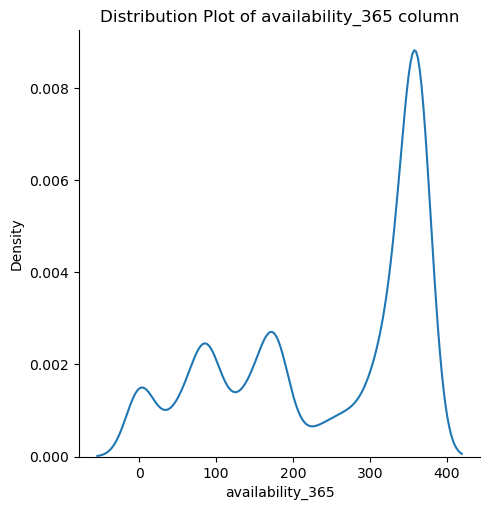

In [71]:
plt.figure(figsize=(12, 5))
sns.displot(data=cleanedDf, x='availability_365', kind='kde')
plt.title('Distribution Plot of availability_365 column')
plt.xlabel('availability_365')
plt.show()

> Median is being used for this column since the graph appears to be right skewed as shown in the distribution plot above.      
> Rooms with reviews within last 6 months has higher median of availability in the future than the rooms with more than 6 months reviews. Showing that recent reviews affect customer behavior on deciding to choose a room. 

#### Room Owner's behavior

##### Is there any relationship between the number of listing an owner has and the number of reviews they receive per listing?

In [72]:
hostReviews = cleanedDf.groupby('host_id').agg({
    'calculated_host_listings_count': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()

hostReviews['reviews_per_listing'] = hostReviews['number_of_reviews'] / hostReviews['calculated_host_listings_count']

hostReviews.sort_values(by='reviews_per_listing', ascending=False).head(5)

,host_id,calculated_host_listings_count,number_of_reviews,reviews_per_listing
3410,116193397,1.0,1224,1224.0
2035,49220458,2.0,746,373.0
124,2389272,2.0,732,366.0
1684,40576227,1.0,363,363.0
1323,30963587,10.0,3584,358.4


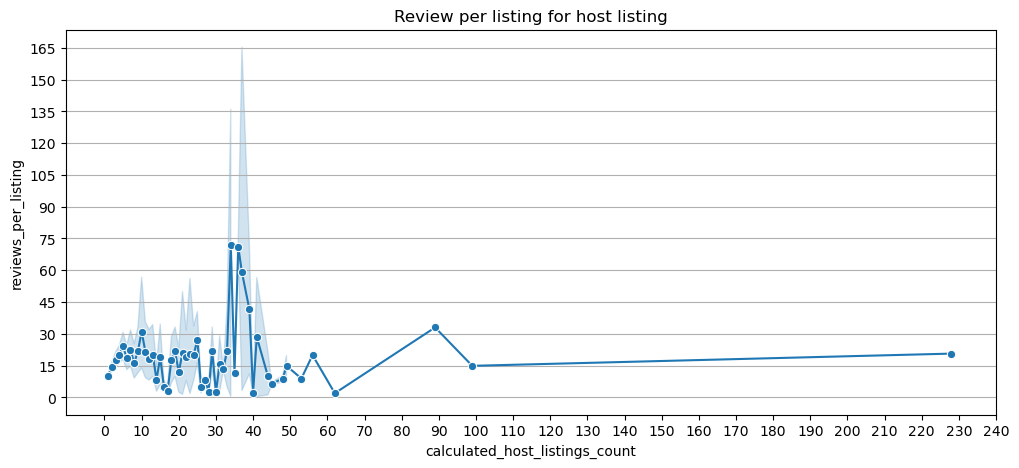

In [73]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=hostReviews, x='calculated_host_listings_count', y='reviews_per_listing', marker='o')
plt.title('Review per listing for host listing')
plt.grid(axis='y')
plt.xticks(ticks=np.arange(0, 241, 10))
plt.yticks(ticks=np.arange(0, 166, 15))
plt.show()

> It is shown that host with host listing around **5 to 15** and **100 to 230** received reviews per listing in range **15 to 30**      
> Meanwhile for calculated host listing **34 and 36** has the highest number of reviews per listing     
> In summary, there's no impact in number of listing an owner has and the number of reviews they receive per listing

##### How does the review count impact the probability of a room being booked?

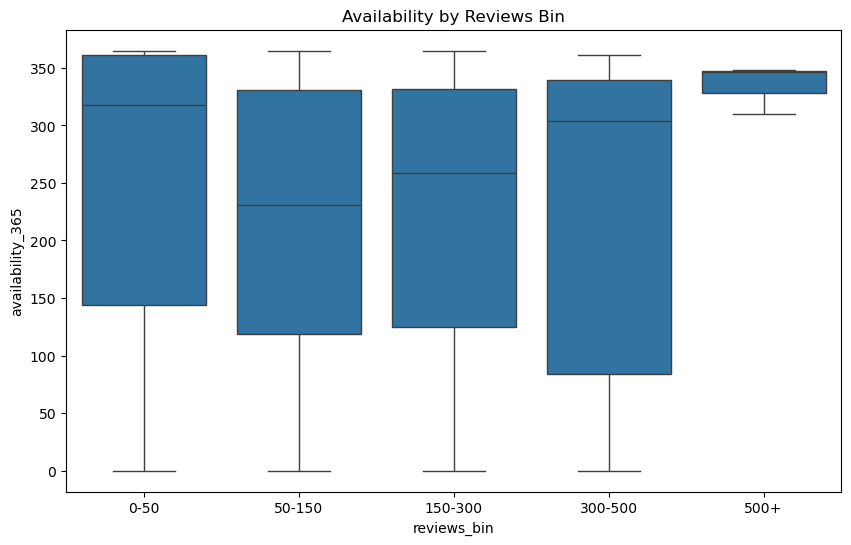

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleanedDf, x='reviews_bin', y='availability_365')
plt.title('Availability by Reviews Bin')
plt.show()

In [75]:
groups = []

for label in ['0-50', '50-150', '150-300', '300-500', '500+']:
    data = cleanedDf[cleanedDf['reviews_bin'] == label]['availability_365']
    stat, p = stats.shapiro(data)
    print(f'{label} - p-value: {p}')
    
    if p > 0.05:
        print(f'{label} is normally distributed\n')
    else:
        print(f'{label} is not normally distributed\n')
    groups.append(data)
        
h_stat, p_value = stats.kruskal(*groups)
print("Kruskal-Wallis p-value:", p_value)


0-50 - p-value: 4.000561808402931e-82
0-50 is not normally distributed

50-150 - p-value: 4.5593603592111874e-27
50-150 is not normally distributed

150-300 - p-value: 1.3613821450842312e-12
150-300 is not normally distributed

300-500 - p-value: 6.9218012449043375e-06
300-500 is not normally distributed

500+ - p-value: 0.08933946491309057
500+ is normally distributed

Kruskal-Wallis p-value: 2.6007148243661744e-43


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14327.
  res = hypotest_fun_out(*samples, **kwds)


>Check the normality distributions for each reviews bin, perform **Kruskal-Wallis** since not every bins are normally distributed.          
>The **p-value** is smaller than 0.05, the null hypothesis (H0) is rejected. So, there is a correlation of number of reviews and availability of the rooms

##### Do room owners with more frequent reviews offer more competitive price compared to those with fewer reviews

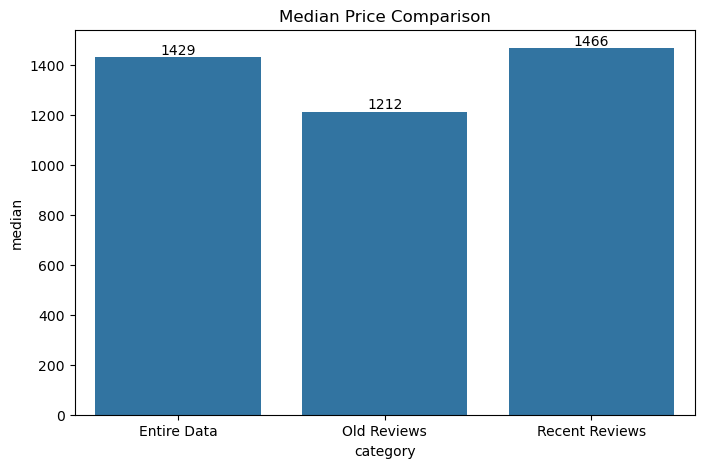

In [76]:
medianDf = pd.DataFrame({
    'category': ['Entire Data', 'Old Reviews', 'Recent Reviews'],
    'median': [cleanedDf['price'].median(), reviewsMoreThan6Mo['price'].median(), reviewsWithin6Mo['price'].median()]
})

plt.figure(figsize=(8, 5))
plot = sns.barplot(data=medianDf, x='category', y='median')
plt.title('Median Price Comparison')
for amount in plot.containers:
    plot.bar_label(amount)

plt.show()

>It is shown that rooms that have **recent reviews** (within 6 months) tends to have **higher price** compared to rooms with **old reviews**

### Conclusion
This section provides a summary of the analysis findings and offers actionable recommendations for Airbnb and room owners.
***

**Conclusion**
> - The room type of **Entire home/apt** receives most reviews compared to other room type, located in the **Khlong Toei** which is most popular neighborhood for **residential** stays.
> - Number of reviews that any room has impacted the probability of its being booked, while the review date does not.

**Recommendation**
> - Increasing the number of reviews for each room type can lead to more bookings, which in turn increases website traffic.
> - The low number of reviews for hotel rooms could negatively impact future business, as hotels are popular with tourists who may rely heavily on reviews when choosing accommodations.
> - Offering a voucher for the next booking after a review is left could be a good strategy to increase review counts and encourage repeat bookings.
> - Encourage room owners with small number of reviews to adjust their listings especially on the room type since **Shared room** and **Hotel room** are popular for tourists, but **Hotel room** has higher booking rate. So room owner with **Shared room** could upgrade their room type to **Hotel room**.

In [77]:
# cleanedDf.to_csv("cleanedData.csv", sep='\t', encoding='utf-8')